In [1]:
import numpy as np
import numpy.polynomial.polynomial as P

import pandas as pd
import glob
import os
import math
import textwrap
from importlib import reload

from sklearn import metrics
from regress2 import regress2
from scipy import stats as sts
import statsmodels.api as sm

In [2]:
import geopandas
import cartopy.io.img_tiles as cimgt

import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy import config
from shapely.geometry import Point
from shapely.prepared import prep
import cartopy

import shapely.geometry as sgeom
from scipy.io import netcdf

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import colors as ccolors
from matplotlib.ticker import MaxNLocator

mycmap = matplotlib.cm.get_cmap('PiYG')

Parameters:  [2.73168469 9.62286251] [0.36538068 0.09115013]
R2:  0.8771251811753473 0.8771251811753473


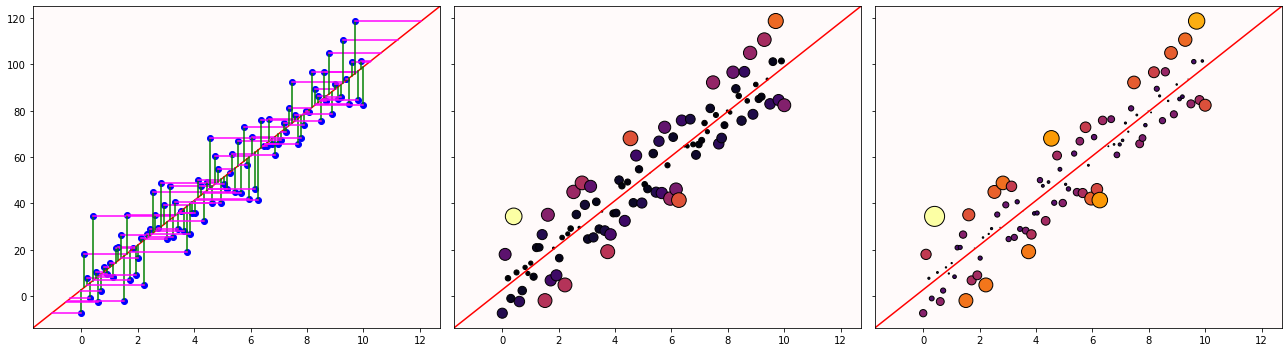

In [3]:
np.random.seed(9876789)

nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 10])
e = np.random.normal(0, 10, size=nsample)
X = sm.add_constant(x)
y = np.dot(X, beta) + e
Y = sm.add_constant(y)

results1 = sm.OLS(y, X).fit()
results2 = sm.OLS(x, Y).fit()

pred1 = np.dot(X,results1.params)
pred2 = np.dot(Y,results2.params)

print("Parameters: ", results1.params, results2.params)
print("R2: ", results1.rsquared, results2.rsquared)

xpred1 = (y - results1.params[0])/results1.params[1]
xres = np.abs(x - xpred1)
yres = np.abs(y - pred1)
rdp = 0.5*xres*yres

fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)

ax[0].scatter(x,y, c='b')
ax[0].axline(xy1=(0,results1.params[0]), slope=results1.params[1], c='r')
for i in range(len(yres)):
    ax[0].plot([x[i], x[i]], [pred1[i], y[i]], c='green')
    ax[0].plot([xpred1[i], x[i]], [y[i], y[i]], c='magenta')

ax[1].axline(xy1=(0,results1.params[0]), slope=results1.params[1], c='r')
ax[1].scatter(x,y, c=rdp, cmap='inferno', edgecolor='k', s=yres*1e1)

ax[2].axline(xy1=(0,results1.params[0]), slope=results1.params[1], c='r')
ax[2].scatter(x,y, c=yres, cmap='inferno', edgecolor='k', s=rdp*1e1)

#ax[1].scatter(y,x, c='b')
#ax[1].axline(xy1=(0,results2.params[0]), slope=results2.params[1], c='r')
#ax[1].axline(xy1=(0,-results1.params[0]/results1.params[0]), slope=1/results1.params[1], c='k')

for i in range(len(ax)):
    ax[i].set_facecolor('snow')

fig.tight_layout()

In [4]:
filename = '../data/geonames_UNSD_WUP_metadata.csv'
meta = pd.read_csv(filename, keep_default_na=False)
isos = pd.unique(meta['ISO'])

meta.head()

,ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,Income,...,Subregion Code,Subregion Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,Europe,HI,...,39,Southern Europe,,,Andorra,20,AND,,,
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,WANA,HI,...,145,Western Asia,,,United Arab Emirates,784,ARE,,,
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,Rest of Asia,LO,...,34,Southern Asia,,,Afghanistan,4,AFG,x,x,
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,Latin America and the Caribbean,X,...,419,Latin America and the Caribbean,029,Caribbean,Antigua and Barbuda,28,ATG,,,x
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,Latin America and the Caribbean,X,...,419,Latin America and the Caribbean,029,Caribbean,Anguilla,660,AIA,,,x


In [168]:
filename = '../data/merged_research_cities500.csv'
data = pd.read_csv(filename, keep_default_na=False).sort_values(by='score', ascending=False)
data = data[data['score'] > 0]
print(data.shape)
isos = pd.unique(data['country_code'])
data.head()

(6424, 11)


,country_code,country,location,score,incountry_rank,matched_iso,matched_pop,dist_difference,population,latitude,longitude
1125,CN,China,"Beijing, Beijing, China",26494,0,CN,Beijing,0.941024,19228974,39.904211,116.407395
1126,CN,China,"Nanjing, Jiangsu, China",10215,1,CN,Nanjing,1.798881,9380716,32.058380,118.796470
3323,JP,Japan,"Nishi Tokyo, Tokyo, Japan",8470,0,JP,Nishi-Tokyo-shi,0.047427,14011171,35.725687,139.538294
4680,KR,South Korea,"Seoul, Gyeonggi Do, South Korea",8069,0,KR,Anyang-si,5.642455,18713663,37.412212,126.868079
1127,CN,China,"Wuhan, Hubei, China",7475,2,CN,Wuhan,3.838929,10392693,30.592760,114.305250


In [169]:
income = ['' for x in range(len(data))]
continent = ['' for x in range(len(data))]

for i,c in enumerate(data['country_code']):
    income[i] = meta[meta['ISO'] == c]['Income'].values[0]
    continent[i] = meta[meta['ISO'] == c]['Continent'].values[0]

In [170]:
data['income'] = income
data['continent'] = continent

In [171]:
colors = ['black', '#0072B2', '#52ADE0', '#009E73', '#E69F00', '#D55E00', '#CC79A7', '#F0E442', '#555555']
labels = ['World', 'Europe', 'Northern America', 'China', 'Rest of Asia','Latin America and the Caribbean', 'Oceania', 'WANA', 'Sub-Saharan Africa']; clabels = ['World', 'Europe', 'Northern America', 'China', 'Rest of Asia','LATAM and Caribbean', 'Oceania', 'W Asia N Africa', 'SubSaharan Africa']; field='continent'
#labels = ['World', 'HI', 'UM', 'CN', 'LM', 'LO', 'X'];clabels = ['World', 'High Income', 'Upper Middle', 'China', 'Lower Middle', 'Low Income', 'Undefined']; field = 'income'

In [172]:
fs = 15
rmask = (data.score > 0).values
masks = [rmask]
for lab in labels[1:]:
    mask = (data[field] == lab).values
    masks.append(rmask & mask)
lrs_scores = [metrics.r2_score, 
              metrics.mean_absolute_error, 
              metrics.mean_squared_error, 
              metrics.mean_squared_log_error,
              metrics.median_absolute_error]
lrs_scores_tags = ['r2',
                   'mean_abs',
                   'mean_sqr',
                   'mean_sqr_log',
                   'median_abs']

trait_x = np.log(data.loc[:, 'population'].values)
trait_y = np.log(data.loc[:, 'score'].values)

In [173]:
## REDUCED MAJOR AXIS

LRS = []

for i, mask in enumerate(masks):
    
    xx = trait_x[mask]
    yy = trait_y[mask]
    
    rma = regress2(xx, yy, _method_type_2="reduced major axis")
        
    rma['xpredict'] = (yy - rma['intercept'])/rma['slope']
    xres = np.abs(xx - rma['xpredict'])
    yres = yy - rma['predict']
    rma['rdp'] = 0.5*xres*yres
    
    for j in range(len(lrs_scores)):
        yt = rma['predict'] - np.min(rma['predict'])
        y0 = yy - np.min(rma['predict'])
        rma[lrs_scores_tags[j]] = lrs_scores[j](y0, yt)
    
    LRS.append(rma)
    
for i in range(len(LRS)):
    bar = [LRS[i]['r'], LRS[i]['slope'], LRS[i]['intercept']]#, LRS[i]['c95_slope'], LRS[i]['c95_inter']]
    foo = '{:.02}\t'*len(bar)
    foo = foo.format(*bar)
    print(labels[i],foo, sep='\t')
    bar = [LRS[i][j] for j in lrs_scores_tags]
    foo = '{:.04}\t'*len(bar)
    foo = foo.format(*bar)
    print('',foo, sep='\t')

World	0.56	1.2	-1.1e+01	
	0.1167	1.561	3.788	0.08103	1.349	
Europe	0.57	1.5	-1.5e+01	
	0.1368	1.669	4.391	0.07824	1.379	
Northern America	0.62	1.2	-1e+01	
	0.2372	1.45	3.307	0.09467	1.217	
China	0.62	1.4	-1.6e+01	
	0.2458	1.437	3.637	0.06218	1.133	
Rest of Asia	0.59	1.3	-1.4e+01	
	0.1857	1.471	3.375	0.06552	1.215	
Latin America and the Caribbean	0.61	1.2	-1.1e+01	
	0.2145	1.297	2.636	0.06154	1.132	
Oceania	0.74	1.1	-8.8	
	0.4711	1.257	2.43	0.1259	1.12	
WANA	0.55	1.2	-1.2e+01	
	0.09073	1.423	3.22	0.08218	1.191	
Sub-Saharan Africa	0.59	1.1	-1e+01	
	0.1837	1.208	2.378	0.1145	1.011	


../plots/global_population_allometry_by_continent


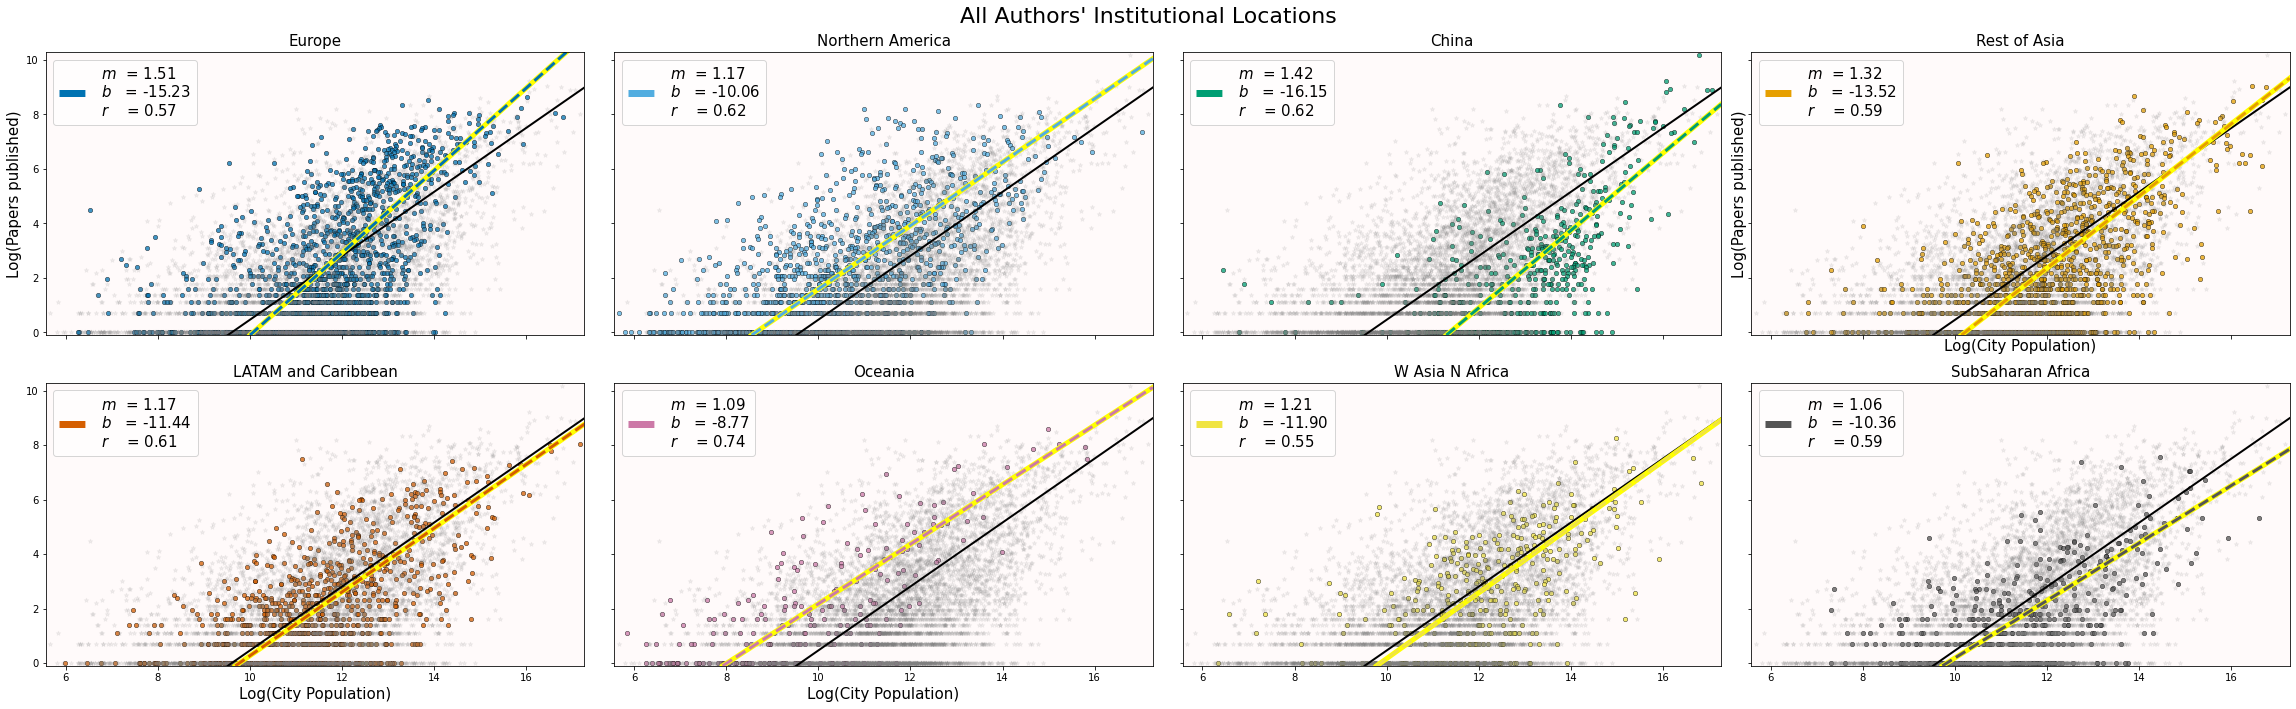

In [174]:
legends = ['' for x in range(len(LRS))]
#fig, ax = plt.subplots(2,3, figsize=(24,10), sharex=True, sharey=True)
fig, ax = plt.subplots(2,4, figsize=(32,10), sharex=True, sharey=True)
ax = np.atleast_1d(ax).flatten()
hh = []

for i in range(len(ax)):
    ax[i].set_facecolor('snow')
    ax[i].set_xlim((np.min(trait_x[rmask])-0.1, np.max(trait_x)+0.1))
    ax[i].set_ylim((np.min(trait_y[rmask])-0.1, np.max(trait_y)+0.1))
    ax[i].axline(xy1=(0,LRS[0]['intercept']), slope=LRS[0]['slope'], color=colors[0], lw=2, ls='-')
    ax[i].set_title(clabels[i+1], fontsize=fs)

for i in range(1,len(masks)):
    mask = masks[i]
    
    xx = trait_x[mask]
    yy = trait_y[mask]
    nx = trait_x[~mask]
    ny = trait_y[~mask]
    
    legends[i] = '$m$  = {:.2f}\n$b$   = {:.2f}\n$r$    = {:.2f}'.format(LRS[i]['slope'], LRS[i]['intercept'], LRS[i]['r'])
    ax[i-1].axline(xy1=(0,LRS[i]['intercept']), slope=LRS[i]['slope'], color='yellow', lw=5, ls='-')
    foo = ax[i-1].axline(xy1=(0,LRS[i]['intercept']), slope=LRS[i]['slope'], 
                   color=colors[i], label=legends[i], lw=3, ls='--')
    hh.append(foo)
    bar = ax[i-1].scatter(xx,yy, edgecolor='k', linewidth=0.5, c=colors[i], s=20, alpha=0.75)
    ax[i-1].scatter(nx,ny, c='gray', s=20, marker='*', alpha=0.1)

    leg = ax[i-1].legend([foo], [legends[i]], loc='upper left', fontsize=fs, markerscale=30);
    for line in leg.get_lines():
        line.set_linewidth(7)

for i in [3,4,5]:
    ax[i].set_xlabel('Log(City Population)', fontsize=fs)
for i in [0,3]:
    ax[i].set_ylabel('Log(Papers published)', fontsize=fs)

fig.suptitle("All Authors' Institutional Locations", fontsize=fs+7)
fig.tight_layout()

filename = '../plots/global_population_allometry_by_'+field
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')
#fig.set_alpha(0)
#plt.savefig(filename + '.svg', format='svg', transparent=False, facecolor=fig.get_facecolor(), bbox_inches='tight')

In [19]:
## BOOTSTRAP
BT = int(1e4)
bootstrap = np.zeros((BT, len(LRS), 2))
tmask = np.ones(len(data), dtype = np.bool)
rng = np.random.default_rng(42)
    

for i in range(BT):
    bmask = rng.integers(0,len(data),len(data))
    bmasks = [bmask]
    for c in labels[1:]:
        foo = data.loc[bmask, field] == c
        bmasks.append(foo.values)
    
    for j in range(len(bmasks)):
        
        mask = bmasks[j]
        
        xx = np.log(data.loc[bmask,'population'][mask])
        yy = np.log(data.loc[bmask,'score'][mask])
    
        rma = regress2(xx, yy, _method_type_2="reduced major axis")
    
        bootstrap[i,j] = rma['slope'], rma['intercept']

In [20]:
filename = '../results/bootstrap_rma_' + field
print(filename)
np.save(filename, bootstrap)

../results/bootstrap_rma_income


In [16]:
filename = '../results/bootstrap_rma_' + field +'.npy'
bootstrap = np.load(filename)
print(bootstrap.shape)
BT = len(bootstrap)

(100000, 9, 2)


In [17]:
bq_slope = np.quantile(bootstrap[:,:,0], [0.025, 0.975], axis=0)
bq_inter = np.quantile(bootstrap[:,:,1], [0.025, 0.975], axis=0)

In [18]:
bgap = np.zeros((BT, 2))
for i in range(BT):
    delta_slope = bootstrap[i,0,0] - bootstrap[i,2,0]
    delta_inter = bootstrap[i,0,1] - bootstrap[i,2,1]
    bgap[i] = [delta_slope, delta_inter]

In [19]:
bqgap = np.quantile(bgap, [0.025, 0.5, 0.975], axis=0)
bqgap

array([[-0.03213971, -1.66318564],
       [ 0.01391366, -1.182859  ],
       [ 0.05898996, -0.69341898]])

In [20]:
bq_slope

array([[1.12288466, 1.42618976, 1.09983015, 1.30409724, 1.25070695,
        1.11075376, 0.99742715, 1.07820014, 0.95463541],
       [1.19773991, 1.54902638, 1.19451655, 1.55801905, 1.36966019,
        1.22929593, 1.16013723, 1.29261565, 1.10882385]])

../plots/global_population_allometry_bootstrapped_continent


/home/ejam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ejam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ejam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ejam/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


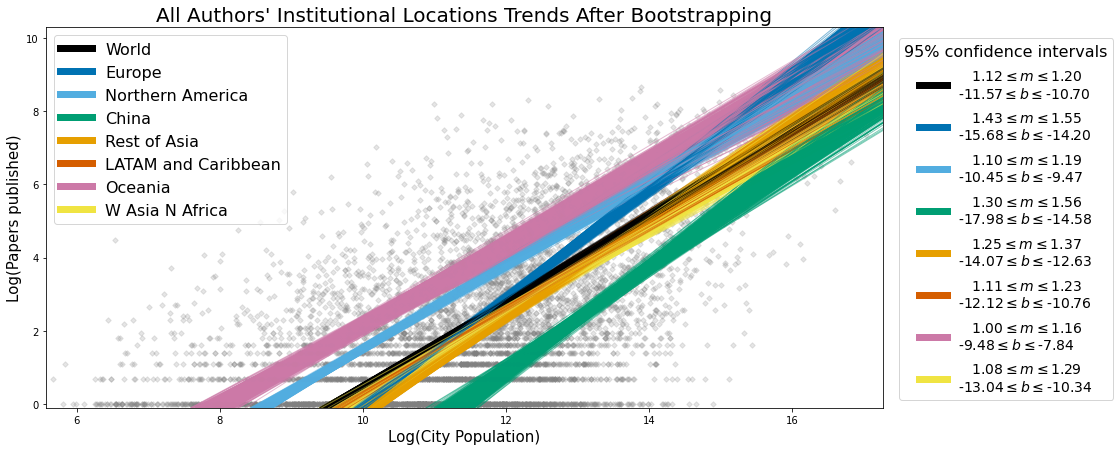

In [21]:
legends = ['' for x in range(len(LRS)-1)]
fig, ax = plt.subplots(1,1, figsize=(15,7))

ax.set_xlim((np.min(trait_x[rmask])-0.1, np.max(trait_x)+0.1))
ax.set_ylim((np.min(trait_y[rmask])-0.1, np.max(trait_y)+0.1))

for i in range(0, BT, 100):
    for j in range(len(LRS)-1):
        ax.axline(xy1=(0,bootstrap[i,j,1]), slope=bootstrap[i,j,0], color=colors[j], lw=1, alpha=0.5)

for j in range(len(LRS)-1):
    ax.axline(xy1=(0,bootstrap[i,j,1]), slope=bootstrap[i,j,0], 
              color=colors[j], lw=0.1, alpha=1, label=clabels[j])
    legends[j] = '   {:.2f}$\leq m\leq${:.2f}\n{:.2f}$\leq b\leq${:.2f}'.format(bq_slope[0,j], bq_slope[1,j],
                                                                             bq_inter[0,j], bq_inter[1,j])

leg = ax.legend(fontsize=16)
for line in leg.get_lines():
    line.set_linewidth(7)

ax.set_xlabel('Log(City Population)', fontsize=fs)
ax.set_ylabel('Log(Papers published)', fontsize=fs)

ax.set_title("All Authors' Institutional Locations Trends After Bootstrapping", fontsize=fs+5)

ax.scatter(trait_x, trait_y, c='gray', s=15, alpha=0.2, marker='D')

h, l = ax.get_legend_handles_labels()
leg = fig.legend(h, legends, fontsize=14, loc='right', fancybox=True,
           bbox_to_anchor=(1.12, 0.5), title='95% confidence intervals',
           title_fontsize = 16, labelspacing=0.75, markerscale=100);

for line in leg.get_lines():
    line.set_linewidth(7)

filename = '../plots/global_population_allometry_bootstrapped_' + field
print(filename);
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

In [22]:
xrange = np.linspace(*np.quantile(trait_x, [0.25,0.75]), 100)
xrange = np.vstack((xrange, np.ones_like(xrange)))
diff = np.zeros((len(bootstrap), xrange.shape[1]))

for i in range(len(bootstrap)):
    hatvals = bootstrap[i] @ xrange
    diff[i] = hatvals[0] - hatvals[2]

In [23]:
print(np.exp(np.mean(diff)))
print(np.exp(np.median(diff)))

print(np.exp(np.quantile(diff, [0.025, 0.5, 0.975])))
print(np.quantile(diff, [0.025, 0.5, 0.975]))

0.3595439231810142
0.35935387645544287
[0.32083583 0.35935388 0.40409127]
[-1.13682573 -1.02344765 -0.90611452]


# Global analysis

In [94]:
# request data for use by geopandas
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

shpfilename = shpreader.natural_earth(resolution, category, name)
df = geopandas.read_file(shpfilename)
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
land_polygons = list(land_10m.geometries())

In [175]:
data[data['country_code'] == 'NA']

,country_code,country,location,score,incountry_rank,matched_iso,matched_pop,dist_difference,population,latitude,longitude,income,continent
3857,NA,Namibia,"Windhoek, Namibia",60,0,NA,Windhoek,1.801884,289375,-22.560881,17.065755,UM,Sub-Saharan Africa
3858,NA,Namibia,"Oshakati, Namibia",3,1,NA,Oshakati,0.195391,43272,-17.789453,15.705779,UM,Sub-Saharan Africa
3859,NA,Namibia,"Maltahohe, Namibia",2,2,NA,Maltahohe,0.616805,2329,-24.838059,16.980135,UM,Sub-Saharan Africa
3860,NA,Namibia,"Henties Bay, Namibia",2,3,NA,Henties Bay,0.353128,3837,-22.113496,14.283204,UM,Sub-Saharan Africa
3863,NA,Namibia,"Katima Mulilo, Namibia",1,6,NA,Katima Mulilo,0.546919,25027,-17.506158,24.280656,UM,Sub-Saharan Africa
3862,NA,Namibia,"Okahandja, Namibia",1,5,NA,Okahandja,1.659257,20879,-21.971882,16.906349,UM,Sub-Saharan Africa
3861,NA,Namibia,"Swakopmund, Namibia",1,4,NA,Swakopmund,8.357393,25047,-22.646743,14.600491,UM,Sub-Saharan Africa


In [176]:
thr = 100
ccmask = ((data['score'] > thr).values) | ((data['population'] > 2.88e5).values)
cdatar = data.iloc[ccmask]

In [177]:
sami = LRS[0]['rdp'][ccmask]
print(sami.shape)
asami = np.abs(sami)
ssami = np.argsort(sami)[::-1]
sssami = np.argsort(ssami)

(2069,)


In [178]:
rlatlon = data.loc[ccmask,['latitude', 'longitude']].values
pad1 = .1
poly = [land_polygons[0]]

exts = [poly[0].bounds[0] - pad1, poly[0].bounds[2] + pad1, poly[0].bounds[1] - pad1, poly[0].bounds[3] + pad1];
exts = [-179,179,-58, 85]
rmask = (rlatlon[:, 0] > exts[2]) & (rlatlon[:, 0] < exts[3]) & (rlatlon[:,1] > exts[0]) & (rlatlon[:,1] < exts[1])
rmaskp = sami[rmask] >= 0
rmaskn = sami[rmask] < 0

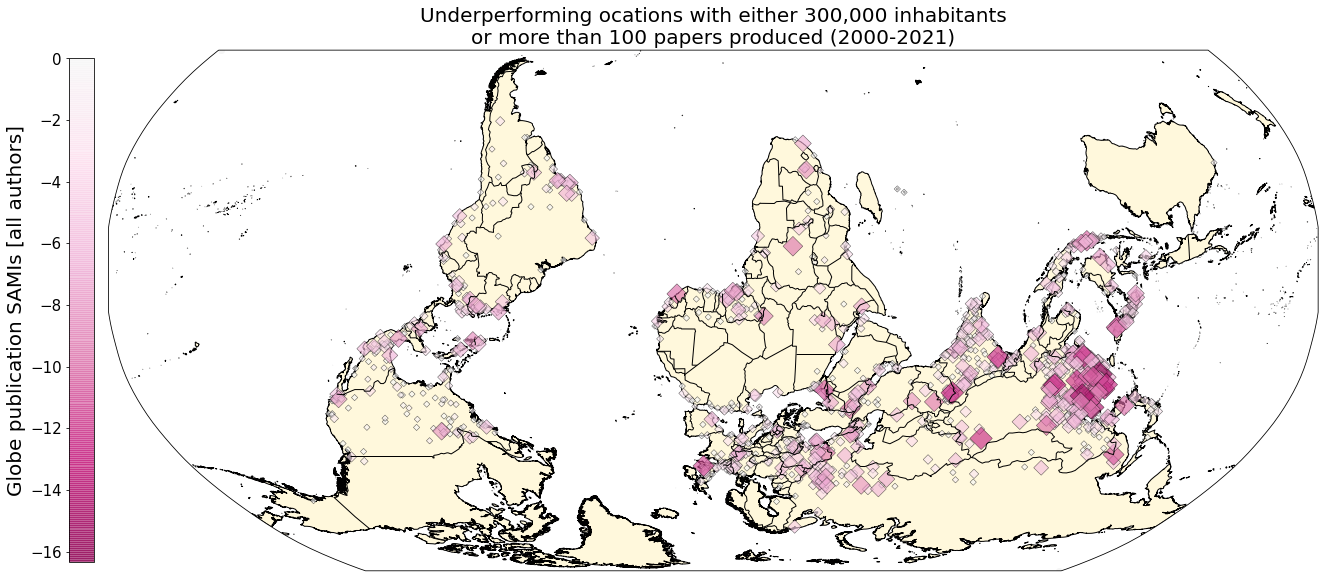

In [188]:
fs = 20
NNN = 2e1
divnorm = ccolors.TwoSlopeNorm(vcenter=0)

prj = ccrs.Robinson()
trn = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1], projection=prj)

ax.add_feature(land_10m, zorder=0, edgecolor='black', facecolor='cornsilk')
ax.set_extent(exts)
cs = ax.scatter(rlatlon[rmaskn,1], rlatlon[rmaskn,0], transform=trn, 
               s=NNN*np.where(asami[rmaskn] > 1, asami[rmaskn], 1), 
                c=sami[rmaskn], marker='D', alpha=0.65, zorder=2, cmap='PiYG', norm=divnorm,
               edgecolor='k', linewidth=0.5);
ax.scatter(exts[:2], exts[2:], transform=trn, facecolor='whitesmoke')

ax.add_feature(cfeature.BORDERS, zorder=19, edgecolor='black', linestyle='-');

title = 'Underperforming ocations with either 300,000 inhabitants\nor more than {} papers produced (2000-2021)'.format(thr)

ax.set_title(title, fontsize=fs)
cbar = fig.colorbar(cs, shrink=0.7, pad=0.01, ax=ax, location='left')
cbar.set_label('Globe publication SAMIs [all authors]', fontsize=fs, rotation=90, position=(-1,0.5))
cbar.ax.tick_params(labelsize=fs-5);

filename = '../plots/globe_under_research_sami'
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

filename = filename + '_inv'
fig.gca().invert_yaxis()
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

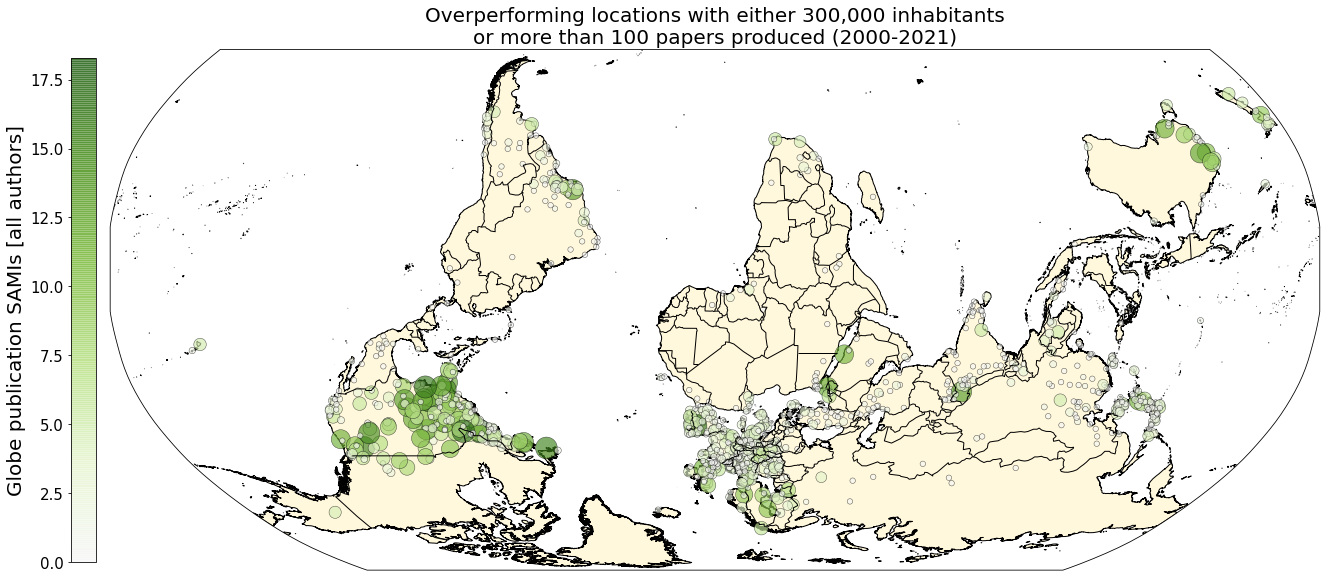

In [186]:
fs = 20
NNN = 3e1
divnorm = ccolors.TwoSlopeNorm(vcenter=0)

prj = ccrs.Robinson()
trn = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1], projection=prj)

ax.add_feature(land_10m, zorder=0, edgecolor='black', facecolor='cornsilk')
ax.set_extent(exts)
cs = ax.scatter(rlatlon[rmaskp,1], rlatlon[rmaskp,0], transform=trn, 
               s=NNN*np.where(asami[rmaskp] > 1, asami[rmaskp], 1), 
                c=sami[rmaskp], marker='o', alpha=0.65, zorder=2, cmap='PiYG', norm=divnorm,
               edgecolor='k', linewidth=0.5);

ax.add_feature(cfeature.BORDERS, zorder=19, edgecolor='black', linestyle='-');

title = 'Overperforming locations with either 300,000 inhabitants\nor more than {} papers produced (2000-2021)'.format(thr)

ax.set_title(title, fontsize=fs)
cbar = fig.colorbar(cs, shrink=0.7, pad=0.01, ax=ax, location='left')
cbar.set_label('Globe publication SAMIs [all authors]', fontsize=fs, rotation=90, position=(-1,0.5))
cbar.ax.tick_params(labelsize=fs-5);

filename = '../plots/globe_over_research_sami'
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

filename = filename + '_inv'
fig.gca().invert_yaxis()
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

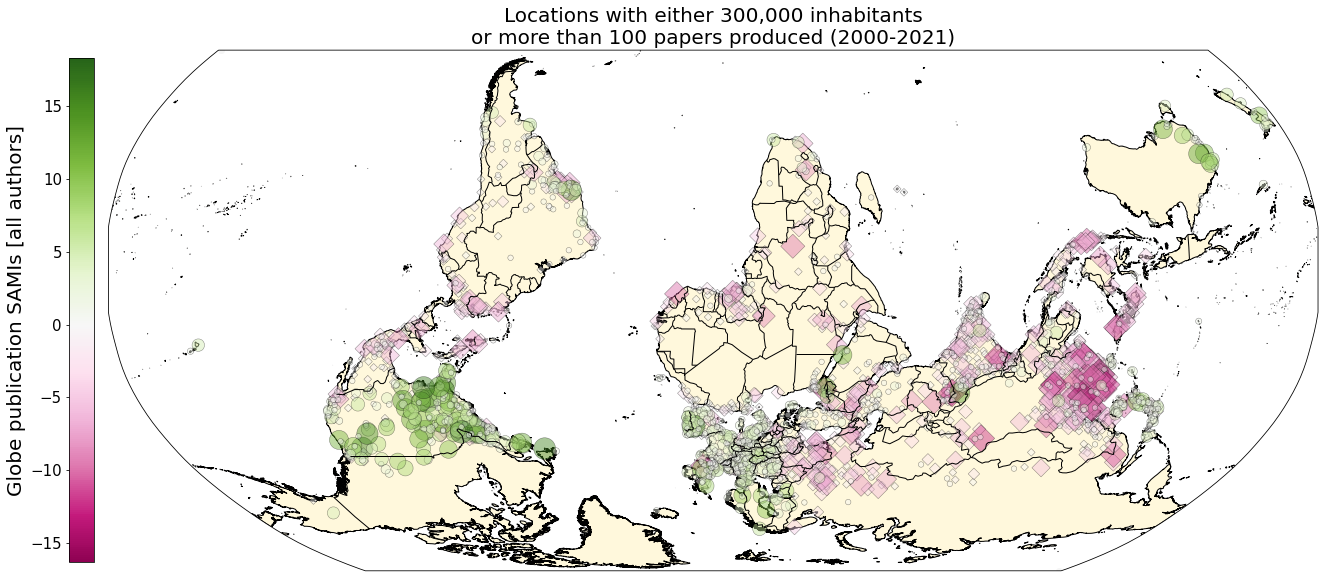

In [189]:
fs = 20
NNN = 3e1
divnorm = ccolors.TwoSlopeNorm(vcenter=0)

prj = ccrs.Robinson()
trn = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1], projection=prj)
ax.add_feature(land_10m, zorder=0, edgecolor='black', facecolor='cornsilk')
ax.set_extent(exts)

cs = ax.scatter(rlatlon[rmask,1], rlatlon[rmask,0], transform=trn, 
               s=0, c=sami[rmask], marker='.', 
                alpha=1, zorder=0, cmap='PiYG', norm=divnorm);
csn = ax.scatter(rlatlon[rmaskn,1], rlatlon[rmaskn,0], transform=trn, 
               s=NNN*np.where(asami[rmaskn] > 1, asami[rmaskn], 1), 
                 c=sami[rmaskn], marker='D', 
                alpha=0.45, zorder=2, cmap='PiYG', norm=divnorm,
               edgecolor='k', linewidth=0.5);
csp = ax.scatter(rlatlon[rmaskp,1], rlatlon[rmaskp,0], transform=trn, 
                 s=NNN*np.where(asami[rmaskp] > 1, asami[rmaskp], 1), 
                 c=sami[rmaskp], marker='o', 
                alpha=0.45, zorder=4, cmap='PiYG', norm=divnorm,
               edgecolor='k', linewidth=0.5);

ax.scatter(exts[:2], exts[2:], transform=trn, facecolor='whitesmoke')

ax.add_feature(cfeature.BORDERS, zorder=19, edgecolor='black', linestyle='-');

title = 'Locations with either 300,000 inhabitants\nor more than {} papers produced (2000-2021)'.format(thr)

ax.set_title(title, fontsize=fs)
cbar = fig.colorbar(cs, shrink=0.7, pad=0.01, ax=ax, location='left')
cbar.set_label('Globe publication SAMIs [all authors]', fontsize=fs, rotation=90, position=(-1,0.5))
cbar.ax.tick_params(labelsize=fs-5);

filename = '../plots/globe_research_sami'
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

filename = filename + '_inv'
fig.gca().invert_yaxis()
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

In [46]:
j = 0
loc = cdatar.iloc[j,2].split(', ')
loc = ', '.join([loc[0],loc[-1]])
ssami[j]

22

In [166]:
i = 0
interest = set()
j = 0
for j in range(15):
    loc = cdatar.iloc[j,2].split(', ')
    loc = ', '.join([loc[0],loc[-1]])
    interest.add((loc, sssami[j]))
    print(j, cdatar.iloc[j,[2,8,6,3]].values, np.round(sami[j],2), sssami[j], sep='\t')

0	['Beijing, Beijing, China' 19228974 'Beijing' 26494]	1.49	441
1	['Nanjing, Jiangsu, China' 9380716 'Nanjing' 10215]	1.3	477
2	['Nishi Tokyo, Tokyo, Japan' 14011171 'Nishi-Tokyo-shi' 8525]	0.51	670
3	['Wuhan, Hubei, China' 10392693 'Wuhan' 7475]	0.74	613
4	['Shanghai, Shaghai, China' 23155474 'Shanghai' 7267]	0.05	875
5	['Guangzhou, Guangdong, China' 25472879 'Guangzhou' 7238]	0.02	911
6	['Hangzhou, Zhejiang, China' 9409446 'Hangzhou' 6784]	0.76	606
7	['Paris, France' 8934408 'Paris' 5749]	0.64	636
8	['Tsukuba, Ibaraki, Japan' 1070296 'Naka' 5737]	5.83	110
9	['Seoul, Gyeonggi Do, South Korea' 16439004 'Anyang-si' 5638]	0.1	835
10	['Crawley, WA, Australia' 3242955 'Crawley' 5342]	2.32	327
11	['Wageningen, Netherlands' 1058296 'Wageningen' 5124]	5.52	122
12	['New Delhi, Delhi, India' 17390601 'New Delhi' 5024]	0.04	889
13	['Taipei, Taiwan' 8710208 'Taipei' 4767]	0.49	679
14	['Kunming, Yunnan, China' 3855346 'Kunming' 4665]	1.7	396


In [48]:
for j in range(50):
    idx = ssami[j]
    loc = cdatar.iloc[idx,2]
    #loc = cdatar.iloc[idx,2].split(', ')
    #loc = ', '.join([loc[0],loc[-1]])
    #interest.add((loc, sssami[idx]))
    print(j, loc, np.round(sami[idx],2), sssami[idx], sep='\t')

0	Ithaca, NY, United States	18.55	0
1	Sede Boqer, Israel	17.99	1
2	University, MS, United States	17.33	2
3	Salamanca, Salamanca, Spain	16.9	3
4	Pullman, WA, United States	16.26	4
5	Tifton, GA, United States	15.56	5
6	Ames, IA, United States	14.58	6
7	Vicosa, MG, Brazil	13.96	7
8	Ardmore, OK, United States	13.91	8
9	Palampur, Himachal Pradesh, India	13.84	9
10	Gainesville, FL, United States	13.68	10
11	University Pk, PA, United States	13.18	11
12	Manhattan, KS, United States	12.87	12
13	Geneva, NY, United States	12.53	13
14	Horsham, Vic, Australia	12.4	14
15	Corvallis, OR, United States	12.34	15
16	Mississippi State, MS, United States	12.0	16
17	Thuwal, Saudi Arabia	11.86	17
18	Stillwater, OK, United States	11.8	18
19	Aberystwyth, Dyfed, Wales	11.57	19
20	W Lafayette, IN, United States	11.52	20
21	Davis, CA, United States	11.49	21
22	Higashihiroshima, Hiroshima, Japan	11.36	22
23	Brookings, SD, United States	11.3	23
24	Wooster, OH, United States	11.05	24
25	Armidale, NSW, Australia	10.9

In [77]:
counter,j = 0,0
while counter < 5:
    k = ssami[j]
    if cdatar.iloc[k,3] > 50:
        loc = cdatar.iloc[k,2].split(', ')
        loc = ', '.join([loc[0],loc[-1]])
        interest.add((loc, sssami[k]))
        print(k, cdatar.iloc[k,[2,8,6,3]].values, np.round(sami[k],2), sssami[k], sep='\t')
        counter += 1
    j += 1

809	['Canterbury, New Zealand' 2301 'Geraldine' 154]	22.18	0
373	['Sede Boqer, Israel' 9862 'Midreshet Ben-Gurion' 472]	18.85	2
22	['Ithaca, NY, USA' 59386 'Ithaca' 3537]	18.53	3
177	['University, MS, USA' 26516 'University' 1080]	17.1	5
958	['Ridgetown, ON, Canada' 3858 'Ridgetown' 110]	16.77	6


In [78]:
len(cdatar)

5302

In [79]:
counter,j = 0,-1
while counter < 6:
    k = ssami[j]
    if cdatar.iloc[k,8] > 1e5:
        #if cdatar.iloc[k,4] > 12:
        #    loc = cdatar.iloc[k,3].split(', ')[0]
        #else:
        loc = cdatar.iloc[k,2].split(', ')
        loc = ', '.join([loc[0],loc[-1]])
        interest.add((loc, sssami[k]))
        print(k, cdatar.iloc[k,[2,8,6,3]].values, np.round(sami[k],2), sssami[k], sep='\t')
        counter += 1
    j -= 1

4758	['Chongqing, Shapingba Qu, Peoples R China' 8685079 'Chongqing' 2]	-19.4	5301
5040	['Jianyang, Fujian, Peoples R China' 2910000 'Jianyangping' 1]	-16.25	5300
5011	['Linquan, Anhui, Peoples R China' 2307000 'Linquan' 1]	-14.86	5299
4971	['Zhucheng, Shandong, Peoples R China' 2086222 'Zhu Cheng City' 1]	-14.27	5298
4680	['Nam Gu, Pusan, South Korea' 3678555 'Busan' 2]	-14.08	5297
4985	['Meizhou, Guangdong, Peoples R China' 1899394 'Jieyang' 1]	-13.74	5296


In [80]:
ranks = pd.DataFrame(interest, columns=['location', 'rank']).sort_values(by='rank').values
ranks[:,1] += 1
ypos = (np.linspace(np.max(sami)-0.3, np.min(sami)+0.3, len(ranks)))
print(len(ranks))
ranks = np.flip(ranks, 1).astype(str)
ranks

28


array([['1', 'Canterbury, New Zealand'],
       ['2', 'Broadway, Australia'],
       ['3', 'Sede Boqer, Israel'],
       ['4', 'Ithaca, USA'],
       ['5', 'Bushland, USA'],
       ['6', 'University, USA'],
       ['7', 'Ridgetown, Canada'],
       ['216', 'Tsukuba, Japan'],
       ['240', 'Wageningen, Netherlands'],
       ['718', 'Crawley, Australia'],
       ['835', 'Kunming, Peoples R China'],
       ['968', 'Beijing, Peoples R China'],
       ['1070', 'Nanjing, Peoples R China'],
       ['1437', 'Hangzhou, Peoples R China'],
       ['1450', 'Wuhan, Peoples R China'],
       ['1532', 'Paris, France'],
       ['1656', 'Nishi Tokyo, Japan'],
       ['1700', 'Taipei, Taiwan'],
       ['2221', 'Seoul, South Korea'],
       ['2303', 'Shanghai, Peoples R China'],
       ['2383', 'New Delhi, India'],
       ['2448', 'Guangzhou, Peoples R China'],
       ['5297', 'Meizhou, Peoples R China'],
       ['5298', 'Nam Gu, South Korea'],
       ['5299', 'Zhucheng, Peoples R China'],
       ['5300

In [81]:
xpos = np.linspace(2,len(sami)-1, len(ranks)).astype(int)
xpos

array([   2,  198,  394,  590,  787,  983, 1179, 1375, 1572, 1768, 1964,
       2160, 2357, 2553, 2749, 2945, 3142, 3338, 3534, 3730, 3927, 4123,
       4319, 4515, 4712, 4908, 5104, 5301])

../plots/globe_sami_ranks


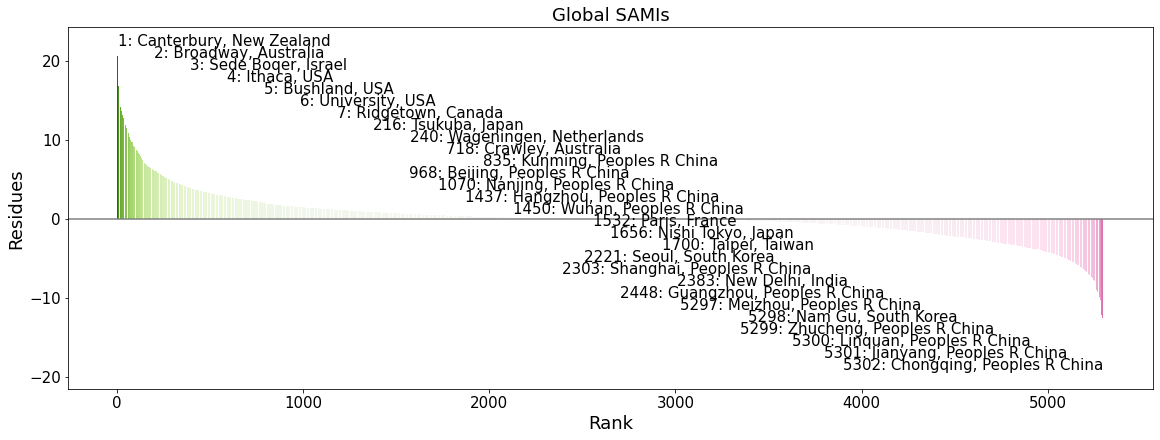

In [82]:
fs = 15
fig, axs = plt.subplots(1,1,sharex=True, sharey=True, constrained_layout=True, figsize=(16,6))
axs = np.atleast_1d(axs).flatten()
axs[0].set_ylabel('Residues', fontsize=fs+3)
for i in range(len(axs)):
    residues = sami[ssami]
    midpoint = 1 - np.max(sami)/np.abs(np.max(sami) - np.min(sami))
    norm_sami = sami-np.min(sami)
    norm_sami /= np.max(norm_sami)
    norm_sami -= midpoint - 0.5
    cols = mycmap(norm_sami)
    axs[i].bar(np.arange(len(sami))+1, residues, color=cols[ssami]);
    axs[i].set_xlabel('Rank', fontsize=fs+3)
    axs[i].axhline(y=0, c='gray')
    axs[i].tick_params(labelsize=fs)
    axs[i].set_title('Global SAMIs', fontsize=fs+3)

for j in range(len(ranks)):
    if residues[xpos[j]] > 0.2:
        ha = 'left'
    elif np.abs(residues[xpos[j]]) <= 0.2:
        ha = 'center'
    else:
        ha = 'right'
    axs[0].text(xpos[j], ypos[j], ': '.join(ranks[j]), fontsize=fs, ha=ha)
    
#fig.suptitle(country + ': SAMIs Ranks', fontsize=fs+5);
filename = '../plots/globe_sami_ranks'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [ ]:
ypos